# Sales Data Analysis

This project demonstrates how to create and analyze a sales dataset using SQLite and Python. It includes generating dummy sales data, storing it in a database, querying the data for analysis, and visualizing the results.

## Steps in the Notebook

**1. Import Required Libraries**

In [1]:
import sqlite3
import random
import pandas as pd
import matplotlib.pyplot as plt

**2. Create SQLite Database and Table**
- Connect to an SQLite database (sales_data.db).
- Create a sales table with columns for id, product, quantity, and price.

In [ ]:
# Connect to SQLite and create the database file
conn = sqlite3.connect("sales_dataset.db")
cursor = conn.cursor()

# Create the sales table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT NOT NULL,
    quantity INTEGER NOT NULL,
    price REAL NOT NULL
)
""")

**3. Generate Dummy Sales Data**
- Generate 1000+ rows of random sales data for five products (Product A, Product B, etc.).
- Each row includes a product name, quantity sold, and price.

In [ ]:
# Generate 1000+ rows of dummy data
products = ["Product A", "Product B", "Product C", "Product D", "Product E"]
sample_data = [(random.choice(products), random.randint(1, 20), round(random.uniform(5.0, 50.0), 2))
    for _ in range(1000)]

**4. Insert Data into the Database**
- Insert the generated dummy data into the sales table.

In [4]:
# Insert the dummy data into the sales table
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)

**5. Commit changes and close the connection**

In [5]:
# Commit changes and close the connection
conn.commit()
conn.close()
print("Database 'sales_data.db' created with 1000+ rows of data successfully.")


Database 'sales_data.db' created with 1000+ rows of data successfully.


# Data Analysis

**1. Query the Database for Analysis**
- Connect to the database and query the total quantity sold and revenue for each product.

In [7]:
# Connect to the SQLite database
conn = sqlite3.connect("sales_dataset.db")
# Define the SQL query
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue
FROM 
    sales
GROUP BY 
    product
"""
# Execute the query and load results into a Pandas DataFrame
df = pd.read_sql_query(query, conn)
df

,product,total_qty,revenue
0,Product A,1934,51733.27
1,Product B,2174,59353.29
2,Product C,2160,61746.65
3,Product D,2275,62654.97
4,Product E,2151,61324.95


**6. Display and Visualize the Results**
- Print the sales summary by product.

In [8]:
# Display the results of the first query
print("Sales Summary by Product:\n")
print(df)

Sales Summary by Product:

     product  total_qty   revenue
0  Product A       1934  51733.27
1  Product B       2174  59353.29
2  Product C       2160  61746.65
3  Product D       2275  62654.97
4  Product E       2151  61324.95


**7. Plot the revenue by product as a bar chart.**

<Figure size 1000x600 with 0 Axes>

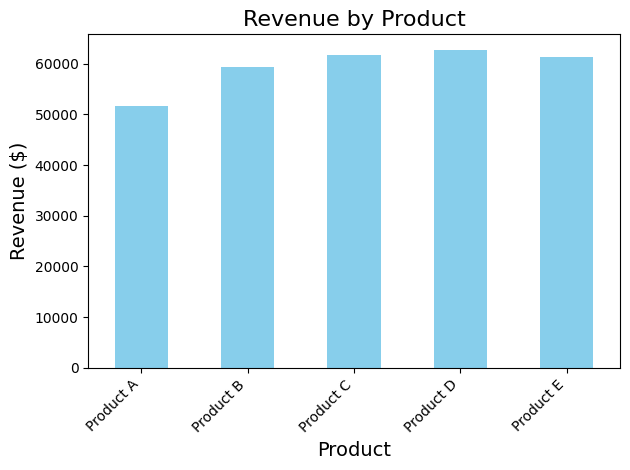

In [9]:
# Plot the results of the query as a bar chart
plt.figure(figsize=(10, 6))
df.plot(kind='bar', x='product', y='revenue', color='skyblue', legend=False)
plt.title("Revenue by Product", fontsize=16)
plt.xlabel("Product", fontsize=14)
plt.ylabel("Revenue ($)", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot as an image (optional)
plt.savefig("sales_chart.png")

# Show the plot
plt.show()

**Output**
- Database: sales_data.db containing the sales table with 1000+ rows of data.
- Analysis: A summary of sales by product displayed in the console.
- Visualization: A bar chart (sales_chart.png) showing revenue by product.

**How to Run**
1. Open the `Sales_data.ipynb` notebook in Jupyter Notebook or any compatible environment.
2. Execute the cells step by step to create the database, generate data, analyze it, and visualize the results.